/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


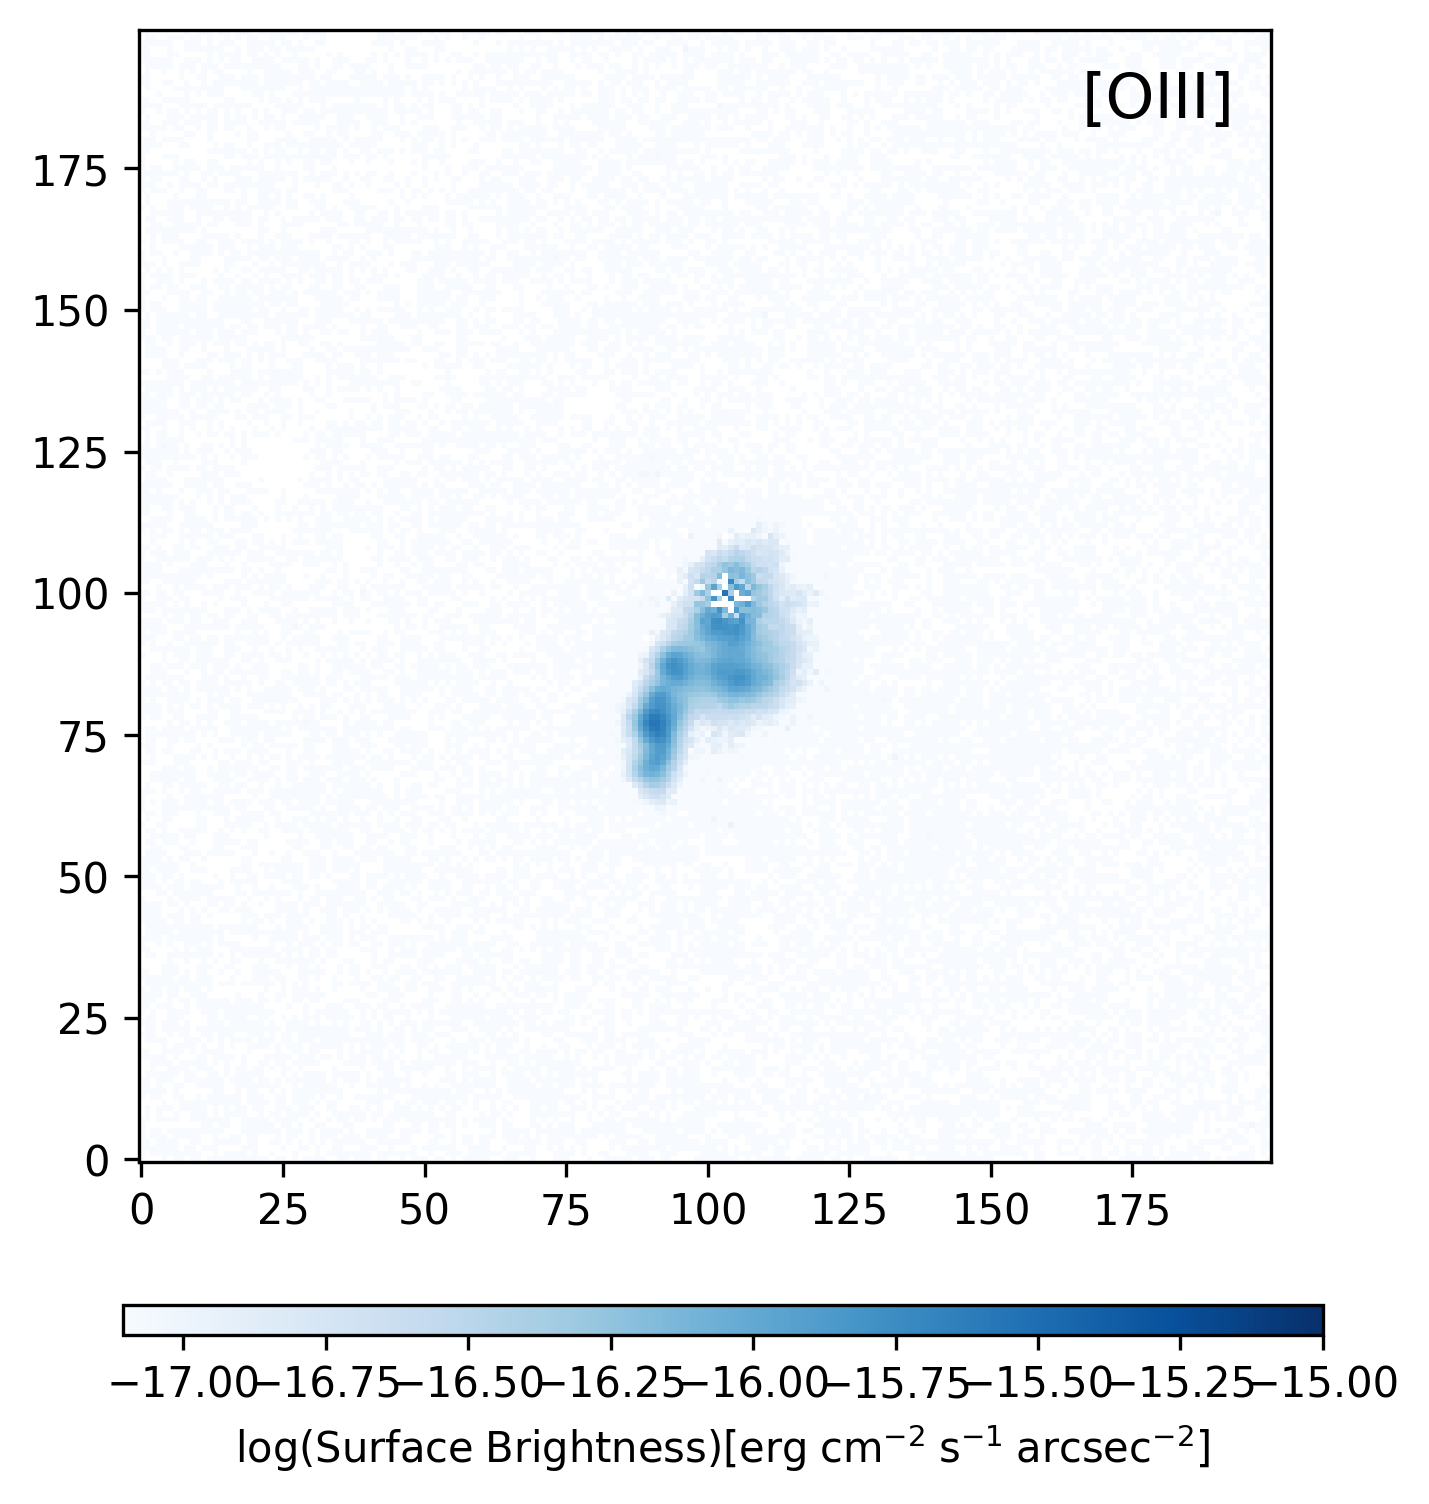

In [10]:
import os
import aplpy
import matplotlib
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from mpdaf.obj import Cube, WCS, WaveCoord, iter_spe
from matplotlib import rc
from matplotlib import cm
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from matplotlib.colors import ListedColormap
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.table import Table

path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OIII_line_SB_offset.fits')
data = fits.getdata(path, 1, ignore_missing_end=True)


Blues = cm.get_cmap('Blues', 256)
Reds = cm.get_cmap('Reds', 256)
newcolors = Blues(np.linspace(0, 1, 256))
newcolors_red = Reds(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)

plt.figure(figsize=(8, 5), dpi=300)
plt.imshow(np.log10(data), cmap=newcmp, vmin=-15, origin='lower')
#plt.axis('off')
plt.title(r'[OIII]', size=15, x=0.9, y=0.9)
c = plt.axes([0.27, 0.01, 0.5, 0.02])
cbar = plt.colorbar(cax=c, orientation='horizontal')
cbar.ax.tick_params(labelsize=10) 
cbar.set_label(r'$\mathrm{log(Surface \; Brightness)[erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$') 
plt.savefig('OIII_image.pdf', bbox_inches='tight')

/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log10
  if sys.path[0] == '':


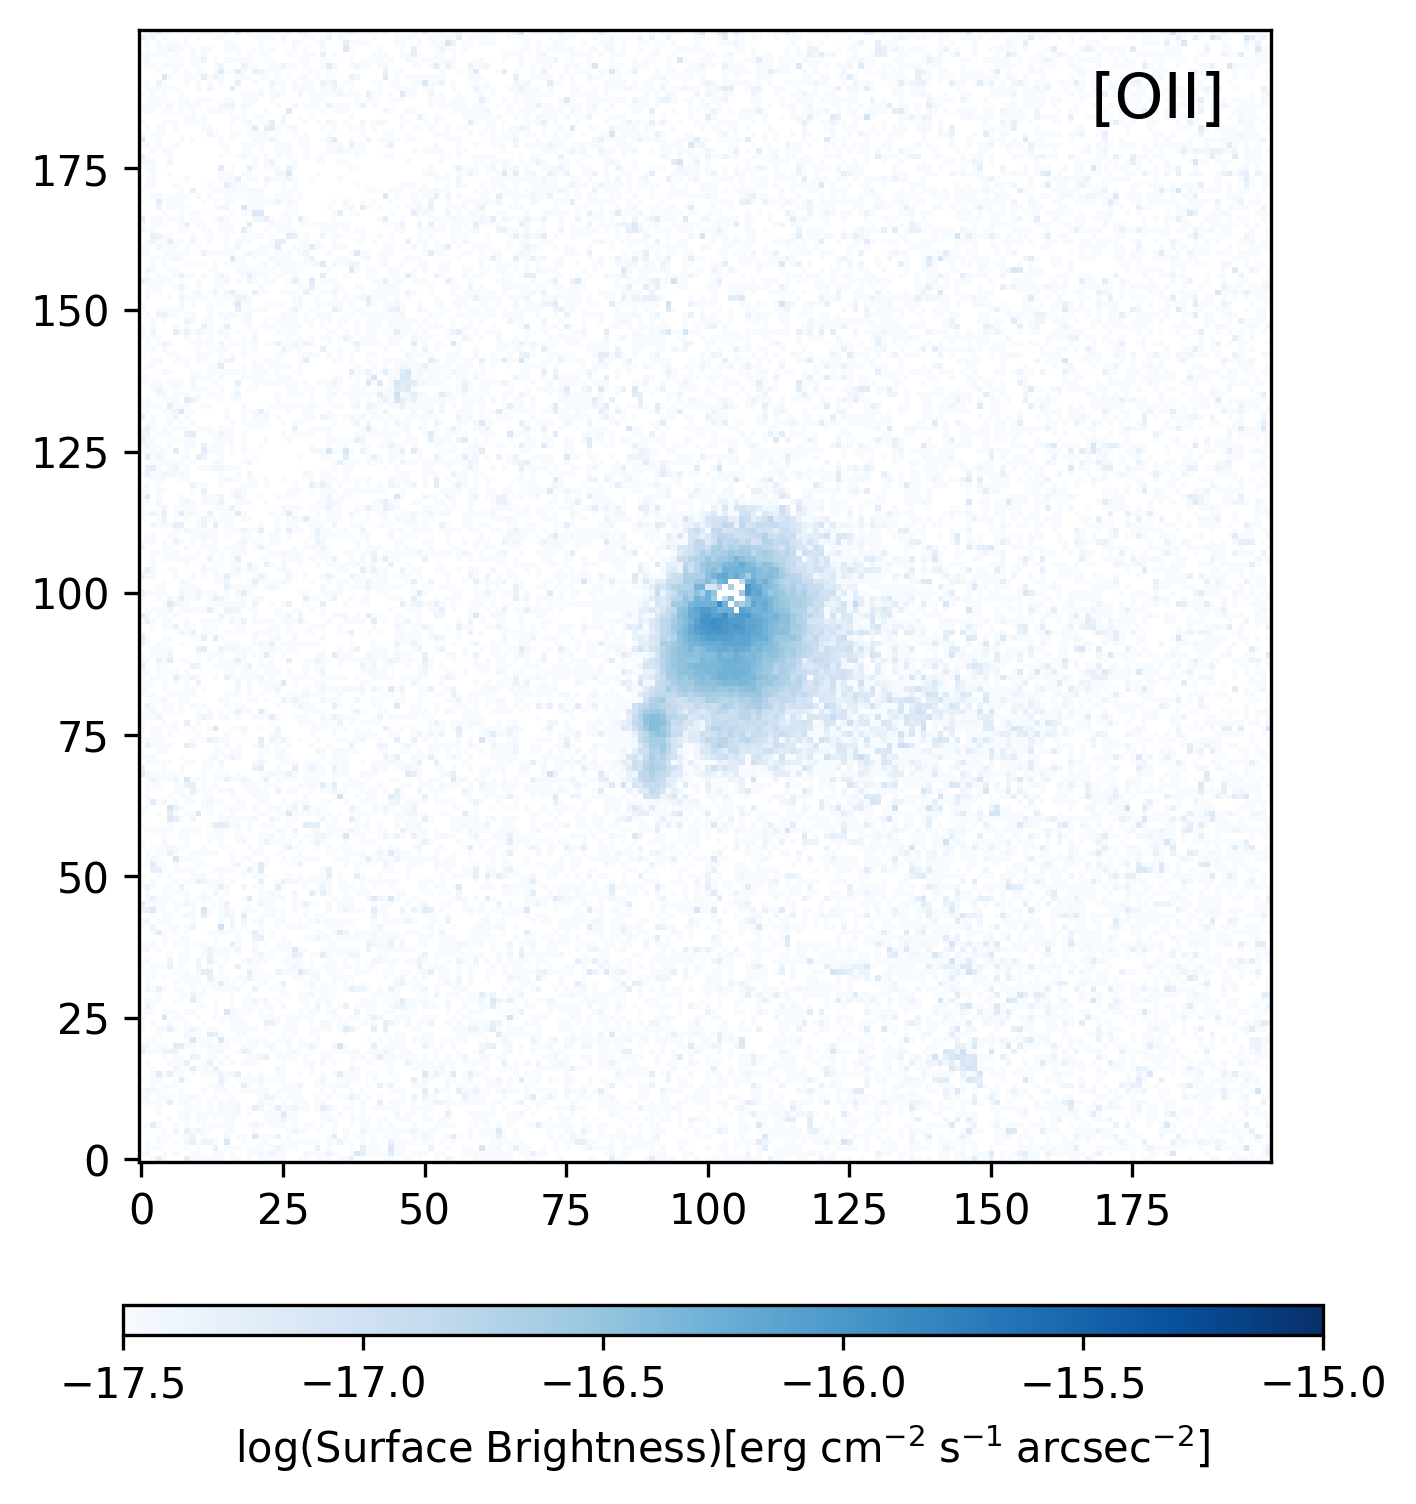

In [11]:
path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'image_OII_line_SB_offset.fits')
data = fits.getdata(path, 1, ignore_missing_end=True)


Blues = cm.get_cmap('Blues', 256)
Reds = cm.get_cmap('Reds', 256)
newcolors = Blues(np.linspace(0, 1, 256))
newcolors_red = Reds(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)

plt.figure(figsize=(8, 5), dpi=300)
plt.imshow(np.log10(data), cmap=newcmp, vmin=-15, origin='lower')
#plt.axis('off')
plt.title(r'[OII]', size=15, x=0.9, y=0.9)
c = plt.axes([0.27, 0.01, 0.5, 0.02])
cbar = plt.colorbar(cax=c, orientation='horizontal')
cbar.ax.tick_params(labelsize=10) 
cbar.set_label(r'$\mathrm{log(Surface \; Brightness)[erg \; cm^{-2} \; s^{-1} \; arcsec^{-2}]}$') 
plt.savefig('OII_image.pdf', bbox_inches='tight')